In [2]:
import pandas as pd
import matplotlib.pyplot as pltplt
import numpy as np


In [3]:
data = pd.read_csv('/Users/driverover/Downloads/đồ_án/disaster_in_vietnam.csv')

In [5]:
data.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1953-0019-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,9.156133,NaN,2006-09-17,2023-09-25
1,1956-0050-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,9.288532,NaN,2003-07-01,2023-09-25
2,1964-0004-VNM,Yes,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,10.598376,NaN,2003-07-01,2023-09-25
3,1964-0063-VNM,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Iris,VNM,...,NaN,NaN,NaN,NaN,50000.0,471770.0,10.598376,NaN,2006-09-17,2023-09-25
4,1964-0102-VNM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,10.598376,NaN,2003-07-01,2023-09-25


In [6]:
print("Kích thước dữ liệu:", data.shape)
print("\nKiểu dữ liệu:")
print(data.dtypes)


Kích thước dữ liệu: (335, 46)

Kiểu dữ liệu:
DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
External IDs                                  object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
OFDA Response                                 object
Appeal                                        object
D

In [7]:
print(data.columns.tolist())


['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update']


In [9]:
main_cols = ['Start Year', 'Disaster Type', 'Total Deaths',
             'Total Affected', 'Total Damage (\'000 US$)', 'Country']
data_main = data[main_cols]
data_main.head()


,Start Year,Disaster Type,Total Deaths,Total Affected,Total Damage ('000 US$),Country
0,1953,Storm,1000.0,NaN,NaN,Viet Nam
1,1956,Storm,56.0,NaN,NaN,Viet Nam
2,1964,Epidemic,598.0,10848.0,NaN,Viet Nam
3,1964,Storm,7000.0,700000.0,50000.0,Viet Nam
4,1964,Flood,400.0,NaN,NaN,Viet Nam


In [10]:
data_main.isnull().sum()


Start Year                   0
Disaster Type                0
Total Deaths                27
Total Affected              68
Total Damage ('000 US$)    192
Country                      0
dtype: int64

In [12]:
data_main['Start_Year'] = data_main['Start Year'].astype(int)


/var/folders/7j/6bgk6d716zdbhx1656p_y59m0000gn/T/ipykernel_23975/2854293965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main['Start_Year'] = data_main['Start Year'].astype(int)


In [13]:
data_main.describe()


,Start Year,Total Deaths,Total Affected,Total Damage ('000 US$),Start_Year
count,335.000000,308.000000,2.670000e+02,1.430000e+02,335.000000
mean,2003.426866,96.490260,3.692490e+05,1.636328e+05,2003.426866
std,13.025075,461.533406,9.986881e+05,5.951083e+05,13.025075
min,1953.000000,1.000000,1.000000e+00,0.000000e+00,1953.000000
25%,1996.000000,11.000000,5.065000e+02,5.730000e+03,1996.000000
50%,2005.000000,21.500000,1.500000e+04,2.300000e+04,2005.000000
75%,2013.000000,56.000000,2.792450e+05,1.340000e+05,2013.000000
max,2023.000000,7000.000000,9.027174e+06,6.750000e+06,2023.000000


In [16]:
disaster_counts = data_main['Disaster Type'].value_counts()
print(disaster_counts)


Disaster Type
Storm                               133
Flood                               103
Road                                 20
Water                                19
Epidemic                             10
Drought                               7
Fire (Miscellaneous)                  6
Air                                   6
Collapse (Industrial)                 6
Mass movement (wet)                   6
Explosion (Industrial)                5
Explosion (Miscellaneous)             3
Poisoning                             2
Miscellaneous accident (General)      2
Fire (Industrial)                     2
Rail                                  2
Infestation                           1
Collapse (Miscellaneous)              1
Wildfire                              1
Name: count, dtype: int64



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


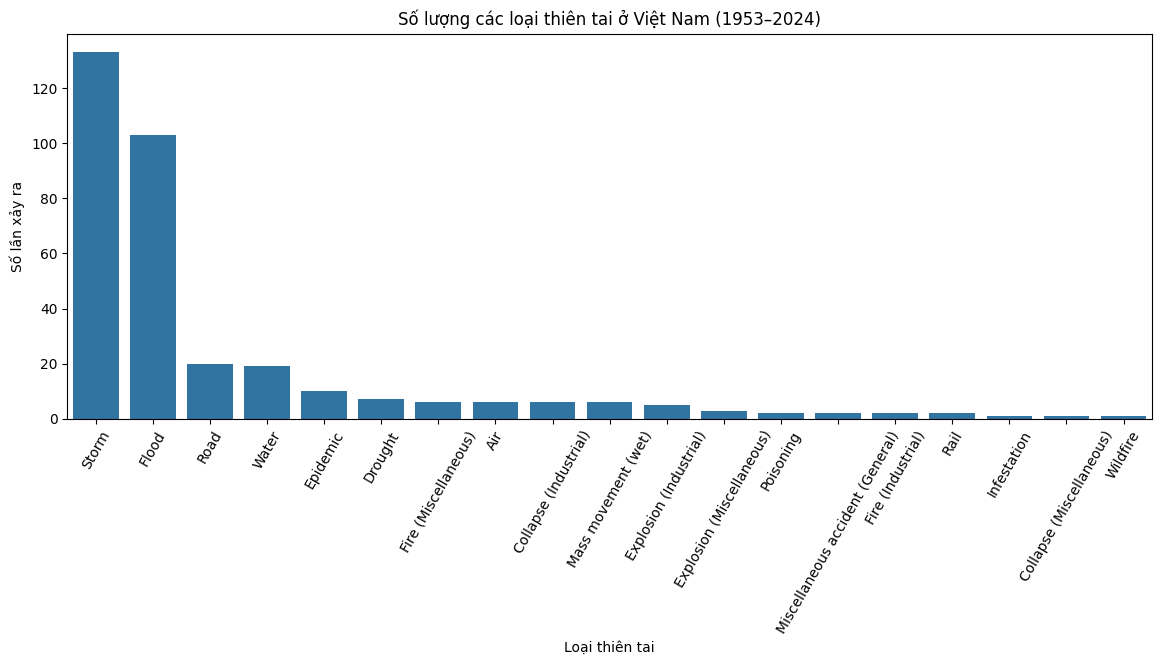

In [20]:
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values)
plt.xticks(rotation=60)
plt.title("Số lượng các loại thiên tai ở Việt Nam (1953–2024)")
plt.xlabel("Loại thiên tai")
plt.ylabel("Số lần xảy ra")
plt.show()


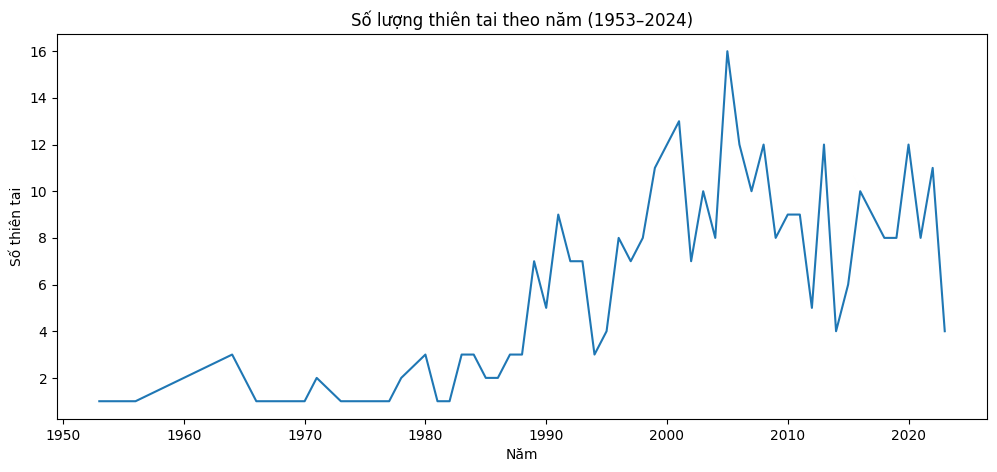

In [21]:
yearly_counts = data_main.groupby('Start_Year').size()
plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Số lượng thiên tai theo năm (1953–2024)")
plt.xlabel("Năm")
plt.ylabel("Số thiên tai")
plt.show()


In [23]:
top_deaths = data_main.groupby('Start_Year')['Total Deaths'].sum().sort_values(ascending=False).head(5)
print(top_deaths)


Start_Year
1964    7998.0
1997    3779.0
1989    1181.0
1996    1086.0
1953    1000.0
Name: Total Deaths, dtype: float64
